<a href="https://colab.research.google.com/github/Reysadena/Mini_Project_Predict_Customer_Clicked_Ads_Classification_by_Using_Machine_Learning/blob/main/Mini_Project_4_Predict_Customer_Clicked_Ads_Classification_by_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install matplotlib --upgrade

# Import Library and Loading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor']='white'
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.6.2


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Clicked Ads Dataset.csv to Clicked Ads Dataset.csv


In [ ]:
import io

cad = pd.read_csv(io.BytesIO(uploaded['Clicked Ads Dataset.csv']))

# EDA

In [ ]:
df = cad.copy()
df.drop(['Unnamed: 0'], inplace=True, axis=1)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [ ]:
print('The dataset has %d rows dan %d columns.' % df.shape)
df.info()

The dataset has 1000 rows dan 10 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


There are missing values in the Daily Time Spent on Site, Area Income, Daily Internet Usage, and Male features. Timestamp's datatype feature is quite suitable, so it has to convert into DateTime

In [ ]:
#convert datatype
df['Timestamp'] = df['Timestamp'].astype('datetime64')

In [ ]:
#grouping data

cats = []
nums = []
dats = []
for col in df.columns: 
    if df[col].dtype == 'object':
        cats.append(col)
    elif df[col].dtype == 'int64' or df[col].dtype == 'float64':
        nums.append(col)
    else:
        dats.append(col)

In [ ]:
df[nums].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


In [ ]:
print ('The mode of Daily Time Spent on Site is', df['Daily Time Spent on Site'].mode()[1])
print ('The mode of Age is', df['Age'].mode()[0])
print ('The mode of Area Income is', df['Area Income'].mode()[1])
print ('The mode of Daily Internet Usage is', df['Daily Internet Usage'].mode()[1])

The mode of Daily Time Spent on Site is 75.55
The mode of Age is 31
The mode of Area Income is 101836420.0
The mode of Daily Internet Usage is 115.91


## Univariate

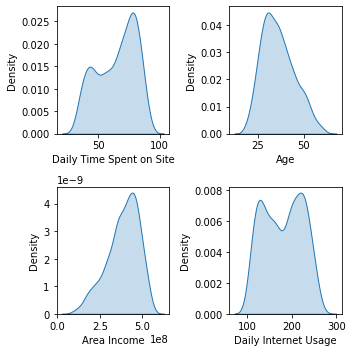

In [ ]:
#visualization for numerical features
plt.figure(figsize=(5,5))
for i in range(0, len(nums)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[nums[i]], palette='rocket', shade=True)
    plt.tight_layout()

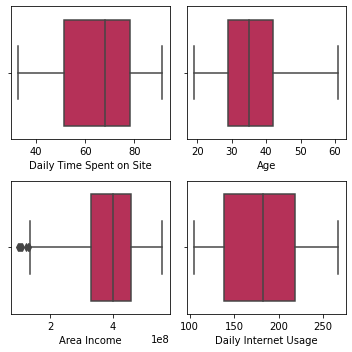

In [ ]:
#visualization for numerical features
plt.figure(figsize=(5,5))
for i in range(0, len(nums)):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[nums[i]], palette='rocket')
    plt.xlabel(nums[i])
    plt.tight_layout()

All numerical features are almost close to normal or symmetrical distribution, except **Area Income** has quite large values between the mode with mean and median. Outliers almost all of them have no outliers except **Area Income**.

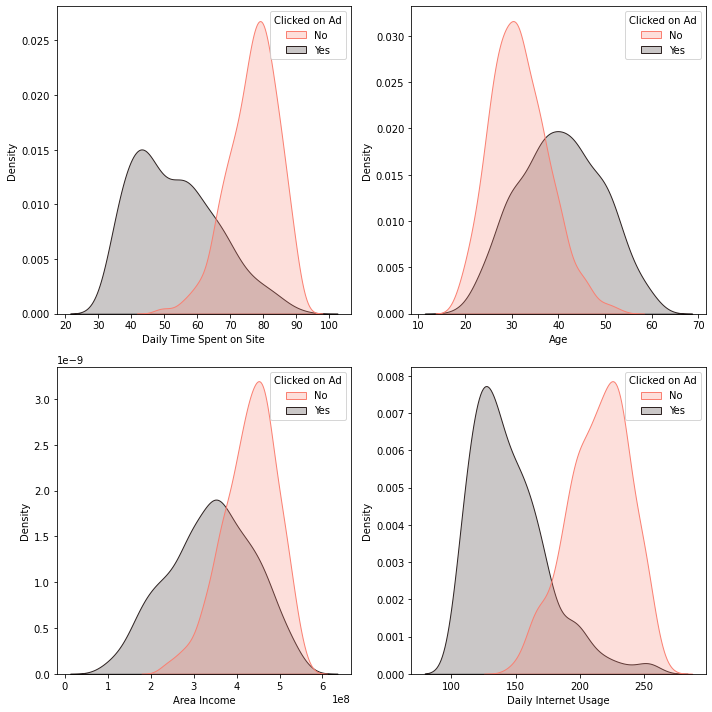

In [ ]:
#visualization for numerical features with hue
plt.figure(figsize=(10,10))
for i in range(0, len(nums)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[nums[i]], hue=df['Clicked on Ad'], palette='dark:salmon_r', shade=True)
    plt.tight_layout()

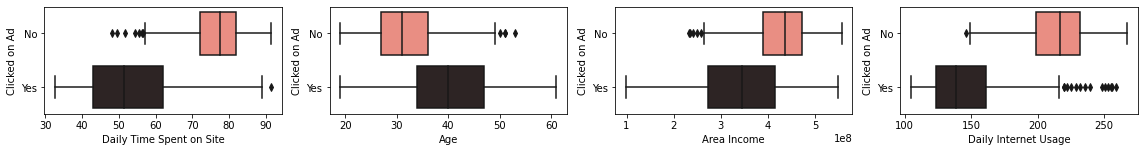

In [ ]:
#visualization for numerical features with hue
plt.figure(figsize=(16,8))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[nums[i]], y=df['Clicked on Ad'], palette='dark:salmon_r')
    plt.xlabel(nums[i])
    plt.tight_layout()

1. Users who click Ads have a Daily Time Spend on the Site of around 40-45 minutes. Meanwhile, users who don't click Ads have Daily Time spend on the Site around 75-80 minutes. 
2. Users who click Ads are, on average, 40 years old, and those who don't are mostly aged 30 years.
3. Users with a Daily Internet Usage of around 100-150 tend to click Ads, then around 200-250 tend not to click Ads.

In [ ]:
df[cats].describe().T

,count,unique,top,freq
Male,997,2,Perempuan,518
Clicked on Ad,1000,2,No,500
city,1000,30,Surabaya,64
province,1000,16,Daerah Khusus Ibukota Jakarta,253
category,1000,10,Otomotif,112


In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Male:
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64

Value count kolom Clicked on Ad:
No     500
Yes    500
Name: Clicked on Ad, dtype: int64

Value count kolom city:
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: city, dtype: int64

Value count kolom province:
Daerah Khusus Ibukota Jakart

In [ ]:
#replaced value
df['province'].replace({'Daerah Khusus Ibukota Jakarta':'DKI Jakarta'},inplace=True)

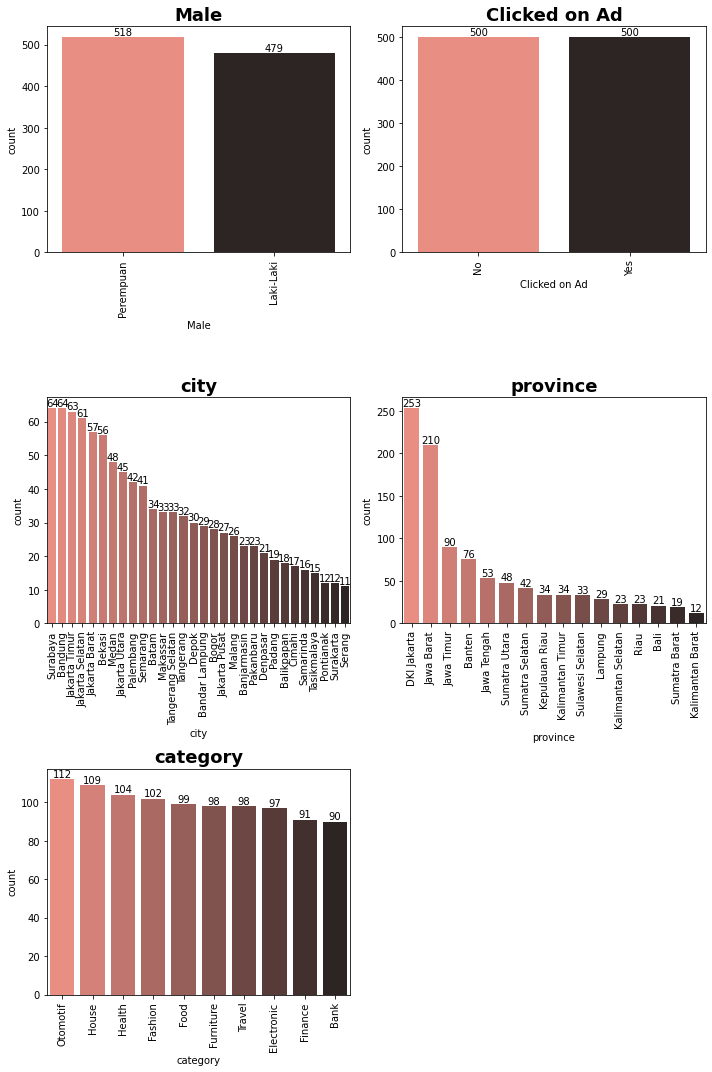

In [ ]:
#visualization for categorical features
fig = plt.figure(figsize=(10,15))
for i in range(len(cats)):
    plt.subplot(3, 2, i+1)
    plt.title(cats[i],fontsize=18, weight='bold')
    ax = sns.countplot(x=cats[i], data=df, palette='dark:salmon_r', order=df[cats[i]].value_counts().index)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.bar_label(ax.containers[0])

1. **Male** feature is dominate with **Perempuan**
2. **Clicked on Ad** feature is balance between **Yes** and **No**
3. **City** feature dominate with two values there are **Surabaya** and **Bandung**
4. **Province** feature is dominate with **Daerah Khusus Ibukota Jakarta**
5. **Category** feature is dominate with **otomotif**



In [ ]:
cats2 = ['Male', 'city', 'province', 'category']

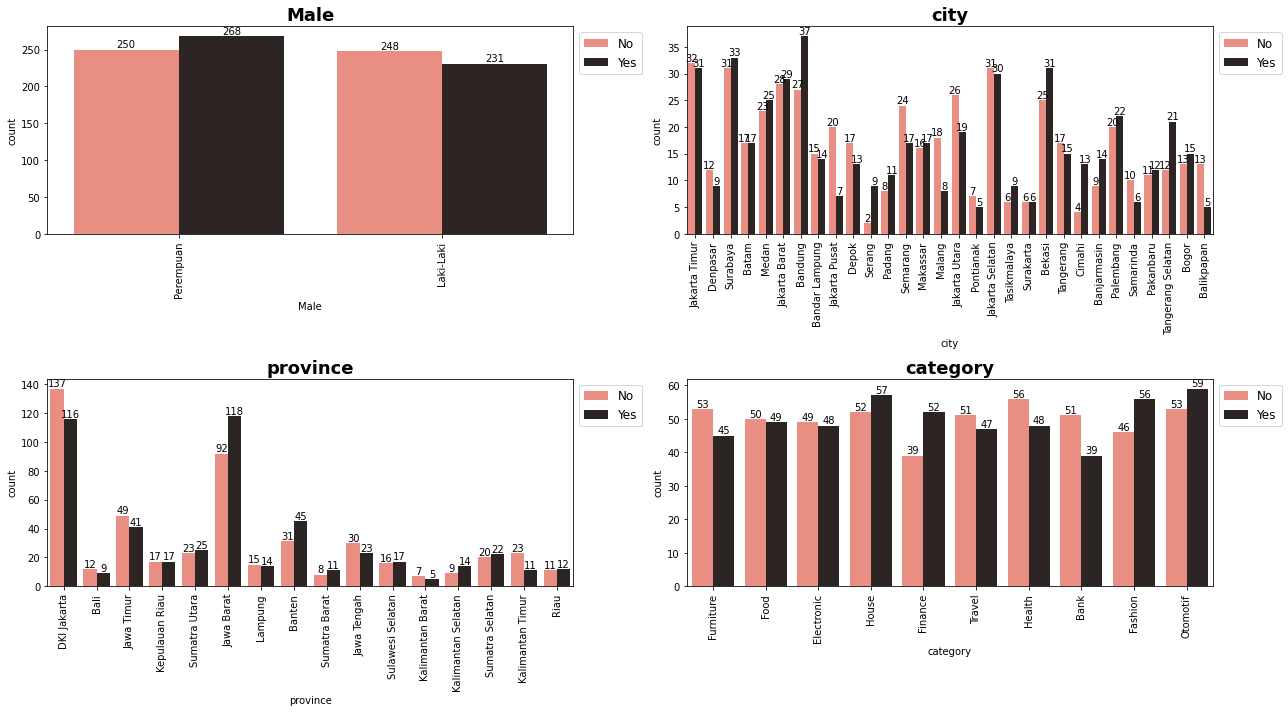

In [ ]:
fig = plt.figure(figsize=(18,10))
for i in range(len(cats2)):
    plt.subplot(2, 2, i+1)
    plt.title(cats2[i],fontsize=18, weight='bold')
    ax = sns.countplot(x=df[cats2[i]], hue=df['Clicked on Ad'], palette='dark:salmon_r')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.legend(fontsize=12, bbox_to_anchor=(1, 1.0), loc='upper left')
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])

1. Gender with the most click-on Ad is **Perempuan**, same as not clicked-on Ad
2. The most clicked Ad is located in **Bandung**
3. The province with the most clicked ad is **Jawa Barat**. Besides, **DKI Jakarta** has become the most not clicked-on Ad. The top 3 the most clicked Ads are located on Java Island
4. The category that most clicked on Ads is **otomotif**; the second is **house**.

## Bivariate

<Figure size 432x432 with 0 Axes>

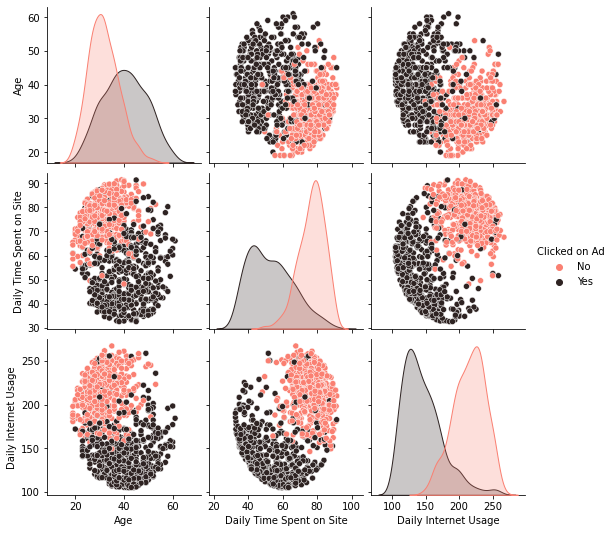

In [ ]:
#bivariate analysis except area income

plt.figure(figsize=(6, 6))
sns.pairplot(df[['Age','Daily Time Spent on Site','Daily Internet Usage','Clicked on Ad']], 
             diag_kind='kde',hue='Clicked on Ad', palette='dark:salmon_r')
plt.show()

1. Users around 40 years old tend to click on Ads with daily internet usage and time spent on the site less than users who didn't click on Ads.
2.   Users who clicked on Ads mostly spend their daily time on site about 40-60 with daily internet usage of less than 200

## Multivariate

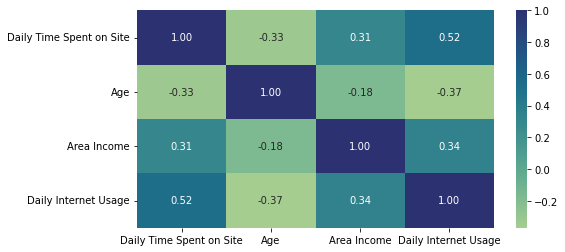

In [ ]:
#correlation for numerical features

plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='crest')
plt.show()

1. The features that correlated with **age** have a negative correlation. The greater the **age**, the lower the customer's **daily internet usage** because their less **daily time spent on the site**, and it affects the **income** decreased. 
2. While the other features have a positive correlation with each other. Without correlating it with age, the greater the customer's **daily time spent on site**, the more significant their **daily internet usage** and **income** area increase.
3. The highest correlation is between the Daily Time Spent on Site with the Daily Internet Usage

# Data Cleaning and Preprocessing

## Cleaning data

Missing values

In [ ]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  987 non-null    float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               987 non-null    float64       
 3   Daily Internet Usage      989 non-null    float64       
 4   Male                      997 non-null    object        
 5   Timestamp                 1000 non-null   datetime64[ns]
 6   Clicked on Ad             1000 non-null   object        
 7   city                      1000 non-null   object        
 8   province                  1000 non-null   object        
 9   category                  1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 78.2+ KB


In [ ]:
#check missing values

null = pd.DataFrame({'null before': df1.isna().sum(), 
              'percent before' : round((df1.isnull().sum() * 100) / len(df1), 2)})
null

,null before,percent before
Daily Time Spent on Site,13,1.3
Age,0,0.0
Area Income,13,1.3
Daily Internet Usage,11,1.1
Male,3,0.3
Timestamp,0,0.0
Clicked on Ad,0,0.0
city,0,0.0
province,0,0.0
category,0,0.0


All the missing values are less than 5%. The median can be imputed for numerical features because the distribution is skewed. Then the categorical feature can be imputed with mode.

In [ ]:
#impute the median to null values for numerical feature
df1.fillna(value = {'Daily Time Spent on Site':df1['Daily Time Spent on Site'].median()}, inplace = True)
df1.fillna(value = {'Area Income':df1['Area Income'].median()}, inplace = True)
df1.fillna(value = {'Daily Internet Usage':df1['Daily Internet Usage'].median()}, inplace = True)

#impute the mode for categorical feature
df1['Male'].fillna('Perempuan',inplace=True)

In [ ]:
#check missing values one more time

null1=null.copy()
null1['null after'] = df1.isna().sum() 
null1 ['percent after'] = round((df1.isnull().sum() * 100) / len(df1), 2)
null1

,null before,percent before,null after,percent after
Daily Time Spent on Site,13,1.3,0,0.0
Age,0,0.0,0,0.0
Area Income,13,1.3,0,0.0
Daily Internet Usage,11,1.1,0,0.0
Male,3,0.3,0,0.0
Timestamp,0,0.0,0,0.0
Clicked on Ad,0,0.0,0,0.0
city,0,0.0,0,0.0
province,0,0.0,0,0.0
category,0,0.0,0,0.0


Duplicated data

In [ ]:
#check duplicate data

df1.duplicated().any()

False

There is no duplicated data on this dataset

## Feature Engineering 

In [ ]:
from datetime import datetime

In [ ]:
df1['year']=df1.Timestamp.dt.year
df1['month']=df1.Timestamp.dt.month
df1['week']=df1.Timestamp.dt.week
df1['day']=df1.Timestamp.dt.day

In [ ]:
print ('city:\n', df1['city'].value_counts())
print ('\nprovince:\n', df1['province'].value_counts())
print ('\ncategory:\n', df1['category'].value_counts())

city:
 Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: city, dtype: int64

province:
 DKI Jakarta           253
Jawa Barat            210
Jawa Timur             90
Banten                 76
Jawa Tengah            53
Sumatra Utara          48
Sumatra Selatan        42
Kepulauan Riau         34
Kalimantan Timur       34
Su

Because column city and province have so many unique values. For better results, we can create new features or columns by replaced the value depending on the match criteria.

In [ ]:
#create capital city feature
df1['capital city']=df1['city'].replace({'Jakarta Timur':'Yes', 'Denpasar':'Yes', 'Surabaya':'Yes', 'Batam':'No', 'Medan':'Yes',
                      'Jakarta Barat':'Yes', 'Bandung':'Yes', 'Bandar Lampung':'Yes', 'Jakarta Pusat':'Yes',
                      'Depok':'No', 'Serang':'Yes', 'Padang':'Yes', 'Semarang':'Yes', 'Makassar':'Yes', 'Malang':'No',
                      'Jakarta Utara':'Yes', 'Pontianak':'Yes', 'Jakarta Selatan':'Yes', 'Tasikmalaya':'No',
                      'Surakarta':'No', 'Bekasi':'No', 'Tangerang':'No', 'Cimahi':'No', 'Banjarmasin':'No',
                      'Palembang':'Yes', 'Samarinda':'Yes', 'Pakanbaru':'Yes', 'Tangerang Selatan':'No',
                      'Bogor':'No', 'Balikpapan':'No'},inplace=False)

#create island feature
df1['island'] = df1['province'].replace({'DKI Jakarta':'Jawa', 'Bali':'Others', 'Jawa Timur':'Jawa', 'Kepulauan Riau':'Sumatera',
       'Sumatra Utara':'Sumatera', 'Jawa Barat':'Jawa', 'Lampung':'Sumatera', 'Banten':'Jawa',
       'Sumatra Barat':'Sumatera', 'Jawa Tengah':'Jawa', 'Sulawesi Selatan':'Sulawesi',
       'Kalimantan Barat':'Kalimantan', 'Kalimantan Selatan':'Kalimantan', 'Sumatra Selatan':'Sumatera',
       'Kalimantan Timur':'Kalimantan', 'Riau':'Sumatera'},inplace=False)

- **capital city** meaning that the city where customers live is the capital city of the province or not

- **island** meaning that the island of the province where customers lived is based on the top 5 biggest island in Indonesia

Top 5 biggest island in Indonesia
1. Papua
2. Kalimantan
3. Sumatera
4. Sulawesi
5. Jawa

In [ ]:
print ('year unique value:\n', df1.year.unique())
print ('\nmonth unique value:\n', df1.month.unique())
print ('\nweek unique value:\n', df1.week.unique())
print ('\nday unique value:\n', df1.day.unique())

year unique value:
 [2016]

month unique value:
 [3 4 1 6 5 7 2]

week unique value:
 [12 14 10  1 22 20  4 16 28 11 18  6  8 24 21 29 15 26  9  2 17  7 23 13
  5 27 19 25 53  3]

day unique value:
 [27  4 13 10  3 19 28  7 18 11 16  8 20 24  9 30  2  5 23 14  1 15 12 17
 26 25 31 22  6 21 29]


Week 53rd could be counted for the previous week's year. Typically in a year have 52 weeks.

In [ ]:
#grouping week
def segment(a):
  if a['week'] <= 17 :
    segment = 'early year'
  elif a['week'] >= 18 and a['week'] <= 36:
    segment = 'mid-year'
  else:
    segment = 'end of year'
  return segment

df1['weeks']=df1.apply(lambda a:segment (a), axis=1)


#grouping day
def segment(x):
  if x['day'] <= 7 :
    segment = 'early month'
  elif x['day'] >= 8 and x['day'] <= 24:
    segment = 'mid-month'
  else:
    segment = 'end of month'
  return segment

df1['days']=df1.apply(lambda x:segment (x), axis=1)

In [ ]:
#drop unnecessary column

df1.drop(columns=['Timestamp','city','province','year','week','day'],inplace=True)

#Timestamp has been extracted
#year column just has one unique value
#week and day grouping into categories

## Split Data Feature and Target

In [ ]:
dfs = df1.copy()

In [ ]:
# Split data feature vs target
X = dfs.loc[:, dfs.columns != 'Clicked on Ad']
y = dfs['Clicked on Ad'] 

## Feature Encoding

In [ ]:
XX=X.copy()
yy=y.copy()

In [ ]:
print ('unique value Male feature are:\n', XX['Male'].unique(),
       '\nunique value capital city feature are:\n', XX['capital city'].unique(),
       '\nunique value island feature are:\n', XX['island'].unique(),
       '\nunique value category feature are:\n', XX['category'].unique(),
       '\nunique value weeks feature are:\n', XX['weeks'].unique(),
       '\nunique value days feature are:\n', XX['days'].unique())

unique value Male feature are:
 ['Perempuan' 'Laki-Laki'] 
unique value capital city feature are:
 ['Yes' 'No'] 
unique value island feature are:
 ['Jawa' 'Others' 'Sumatera' 'Sulawesi' 'Kalimantan'] 
unique value category feature are:
 ['Furniture' 'Food' 'Electronic' 'House' 'Finance' 'Travel' 'Health'
 'Bank' 'Fashion' 'Otomotif'] 
unique value weeks feature are:
 ['early year' 'mid-year' 'end of year'] 
unique value days feature are:
 ['end of month' 'early month' 'mid-month']


Label encoding

In [ ]:
#change value Yes = 1 dan No = 0 for Clicked on Ad
yy = np.where(yy=='Yes',1,0)

get_dummy

In [ ]:
#Encoding for island feature 
XX = pd.get_dummies(XX, prefix="island", 
                            columns=["island"], 
                            drop_first=False)

#Encoding for category feature
XX = pd.get_dummies(XX, prefix="category", 
                            columns=["category"], 
                            drop_first=False)

#Encoding for Male feature
XX = pd.get_dummies(XX, prefix="Male", 
                            columns=["Male"], 
                            drop_first=False)

#Encoding for capital cityfeature
XX = pd.get_dummies(XX, prefix="capital city", 
                            columns=["capital city"], 
                            drop_first=False)

#Encoding for weeks feature
XX = pd.get_dummies(XX, prefix="weeks", 
                            columns=["weeks"], 
                            drop_first=False)

#Encoding for daysfeature
XX = pd.get_dummies(XX, prefix="days", 
                            columns=["days"], 
                            drop_first=False)

Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2

In [ ]:
chi2_selector = SelectKBest(chi2, k=15) 
chi2_selector.fit(XX, yy)

cols = chi2_selector.get_support(indices=True)
df_selected_features = XX.iloc[:,cols]
df_selected_features.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'island_Kalimantan', 'island_Others',
       'category_Bank', 'category_Fashion', 'category_Finance',
       'category_Furniture', 'category_Health', 'category_Otomotif',
       'Male_Laki-Laki', 'Male_Perempuan', 'weeks_end of year'],
      dtype='object')

# Data Modelling

In [ ]:
XX1 = XX [['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'island_Kalimantan', 'island_Others',
       'category_Bank', 'category_Fashion', 'category_Finance',
       'category_Furniture', 'category_Health', 'category_Otomotif',
       'Male_Laki-Laki', 'Male_Perempuan', 'weeks_end of year']]

In [ ]:
#Standarization
X1 = XX1.copy()
y1 = yy.copy()

#Without standrization
X2 = XX1.copy()
y2 = yy.copy()

## Split Data Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

#train:test = 70:30 with standarization
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=42)

In [ ]:
print('Split into 70:30 with standarization\n','\nTotal rows & column of train set:',X1_train.shape,'\nTotal rows & column of test set:',X1_test.shape)

Split into 70:30 with standarization
 
Total rows & column of train set: (700, 15) 
Total rows & column of test set: (300, 15)


In [ ]:
#train:test = 70:30 without standarization
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.3, random_state=42)

In [ ]:
print('Split into 70:30 without standarization\n','\nTotal rows & column of train set:',X2_train.shape,'\nTotal rows & column of test set:',X2_test.shape)

Split into 70:30 without standarization
 
Total rows & column of train set: (700, 15) 
Total rows & column of test set: (300, 15)


## Default Parameter

In [ ]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
from sklearn.metrics import roc_auc_score #roc score

### **Logistic regression with Standarization**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.fit_transform(X1_test)

In [ ]:
# train the model
logr = LogisticRegression(random_state=1, solver='liblinear')

#predict
y1_trp = logr.fit(X1_train, y1_train).predict(X1_test)

# print classification report
print(classification_report(y1_test, y1_trp))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       146
           1       0.98      0.95      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
#print("Accuracy : %.2f" % accuracy_score (y1_test, y1_trp))
#print("Precision : %.2f" % precision_score (y1_test, y1_trp, zero_division=0))
#print("Recall : %.2f" % recall_score (y1_test, y1_trp))
#print("F1-Score : %.2f" % f1_score (y1_test, y1_trp))

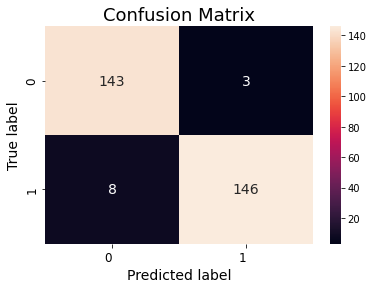

In [ ]:
#form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y1_test, y1_trp)))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='rocket')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), ha='right', fontsize=12)

plt.title('Confusion Matrix', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### **Decission Tree with Standarization**

In [ ]:
#train model
dt = DecisionTreeClassifier(random_state=1)
predict_dt1 = dt.fit(X1_train,y1_train).predict(X1_test)

#print classification report
print(classification_report(y1_test, predict_dt1))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       146
           1       0.94      0.94      0.94       154

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



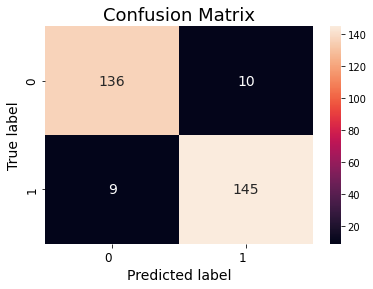

In [ ]:
#form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y1_test, predict_dt1)))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='rocket')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), ha='right', fontsize=12)

plt.title('Confusion Matrix', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### **Random Forest with Standarization**

In [ ]:
#train model
rf = RandomForestClassifier(random_state=1)
predict_rf1=rf.fit(X1_train, y1_train).predict(X1_test)

#print classification report
print(classification_report(y1_test, predict_rf1))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       146
           1       0.96      0.96      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



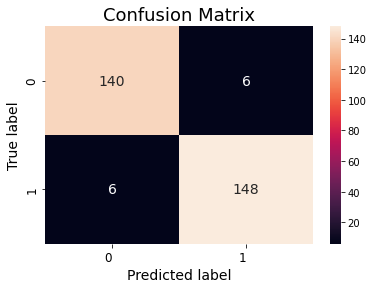

In [ ]:
#form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y1_test, predict_rf1)))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='rocket')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), ha='right', fontsize=12)

plt.title('Confusion Matrix', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### **Logistic Regression Without Standarization**

In [ ]:
# train the model
logr2 = LogisticRegression(random_state=1, solver='liblinear')

#predict
pred_logr2 = logr2.fit(X2_train, y2_train).predict(X2_test)

# print classification report
print(classification_report(y2_test, pred_logr2))

              precision    recall  f1-score   support

           0       0.49      1.00      0.65       146
           1       0.00      0.00      0.00       154

    accuracy                           0.49       300
   macro avg       0.24      0.50      0.33       300
weighted avg       0.24      0.49      0.32       300



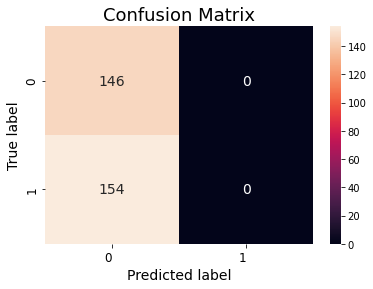

In [ ]:
#form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y1_test, pred_logr2)))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='rocket')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), ha='right', fontsize=12)

plt.title('Confusion Matrix', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### **Decission Tree without Standarization**

In [ ]:
#train model
dt2 = DecisionTreeClassifier(random_state=1)
predict_dt2 = dt2.fit(X2_train,y2_train).predict(X2_test)

#print classification report
print(classification_report(y2_test, predict_dt2))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       146
           1       0.92      0.94      0.93       154

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



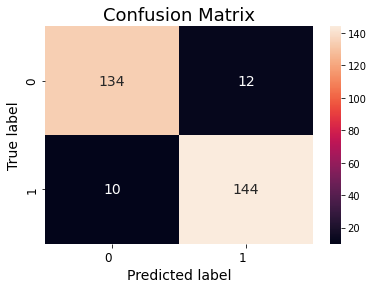

In [ ]:
#form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y2_test, predict_dt2)))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='rocket')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), ha='right', fontsize=12)

plt.title('Confusion Matrix', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### **Random Forest without Standarization**

In [ ]:
#train model
rf2 = RandomForestClassifier(random_state=1)
predict_rf2=rf2.fit(X2_train, y2_train).predict(X2_test)

#print classification report
print(classification_report(y2_test, predict_rf2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       146
           1       0.95      0.95      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



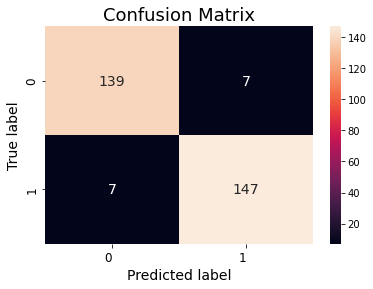

In [ ]:
#form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y2_test, predict_rf2)))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='rocket')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), ha='right', fontsize=12)

plt.title('Confusion Matrix', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

## Hyperparameter Tuning